In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1h7tQ-gJiVhvyVPUss_LD1m4UYMdJ9Oq8' #<-- You add in here the id from you google drive file, you can find it
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
df  = pd.read_csv("file.csv")

In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### Data Summary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [7]:
display(df.describe(exclude=np.number).T)

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


### Data Preprocessing

In [8]:
missing = df.isnull().sum()/len(df)*100
missing[missing>0]

Name                        9.985
Monthly_Inhand_Salary      15.002
Type_of_Loan               11.408
Num_of_Delayed_Payment      7.002
Num_Credit_Inquiries        1.965
Credit_History_Age          9.030
Amount_invested_monthly     4.479
Monthly_Balance             1.200
dtype: float64

In [9]:
object_col = df.describe(include='O').columns
object_col

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [10]:
for col in object_col:
    print(f"Unique Values of {col}")
    print(df[col].unique())
    print("==================================================")

Unique Values of ID
['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']
Unique Values of Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Unique Values of Month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Unique Values of Name
['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
Unique Values of Age
['23' '-500' '28_' ... '4808_' '2263' '1342']
Unique Values of SSN
['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
Unique Values of Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Unique Values of Annual_Income
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Unique Values of Num_of_Loan
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9

In [11]:
for col in object_col:
    print('Column Name: '+col)
    print("=="*20)
    print(df[col].value_counts(dropna=False))
    print('END', "=="*20, '\n')

Column Name: ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64
END ======================================== 

Column Name: Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
END ======================================== 

Column Name: Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
END ======================================== 

Column Name: Name
NaN               9985
Stevex              44
Langep              44
Jessicad            39
Vaughanl            39
                  ... 
Robin Pomeroyz       4
Matt Scuffhamk       4
Julieno              4

In [12]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [13]:
df.Age.unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [14]:
df['Age'] = df['Age'].apply(lambda x: x.strip('_')) #removing _ from the age feature

In [15]:
df.Age.unique()

array(['23', '-500', '28', ..., '4808', '2263', '1342'], dtype=object)

In [16]:
df['Age'] = df.Age.astype(int) #converting object to integer

In [17]:
df.Month.unique() #no messy data in month

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [18]:
df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month

In [19]:
df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"') #Removing junk values in the dataset
                      ).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [20]:
# fill missing salary based on person's SSN
df['Monthly_Inhand_Salary'] = df.groupby(['SSN'])['Monthly_Inhand_Salary'].ffill()

In [21]:
df.SSN.unique() #Checking for messy data in SSN

array(['821-00-0265', nan, '004-07-5839', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [22]:
df['SSN'] = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)

In [23]:
df.SSN[0]

821000265.0

In [24]:
#changing data types of the numerical columns
df['Annual_Income'] = df.Annual_Income.astype(float)
df['Num_of_Loan'] = df.Num_of_Loan.astype(int) 
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)

In [25]:
df['Credit_History_Age'][0] #need to convert into numerical data

'22 Years and 1 Months'

In [26]:
def Month_Converter(x): #function to convert categorical into numerical no. of months
    if pd.notnull(x):
        year = int(x.split(' ')[0])
        month = int(x.split(' ')[3])
      
        return (year*12)+month
    else:
        return x

In [27]:
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [28]:
df['Credit_History_Age'][0] #converted 22 Years and 1 Months to 265 months

265.0

In [29]:
df.groupby('Customer_ID')['Credit_History_Age'].apply(list) #group customer_id with their Credit history age. We can see that each instance increases by one month

Customer_ID
CUS_0x1000    [122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128...
CUS_0x1009    [365.0, 366.0, 367.0, nan, 369.0, 370.0, 371.0...
CUS_0x100b    [183.0, nan, 185.0, 186.0, 187.0, 188.0, 189.0...
CUS_0x1011    [183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189...
CUS_0x1013    [207.0, 208.0, 209.0, 210.0, nan, 212.0, 213.0...
                                    ...                        
CUS_0xff3     [201.0, 202.0, 203.0, 204.0, 205.0, 206.0, 207...
CUS_0xff4     [218.0, 219.0, 220.0, 221.0, 222.0, nan, 224.0...
CUS_0xff6     [292.0, 293.0, 294.0, 295.0, 296.0, 297.0, 298...
CUS_0xffc     [151.0, nan, 153.0, 154.0, 155.0, 156.0, 157.0...
CUS_0xffd     [218.0, 219.0, 220.0, 221.0, 222.0, 223.0, 224...
Name: Credit_History_Age, Length: 12500, dtype: object

In [30]:
df['Type_of_Loan'].value_counts(dropna=False) # there are many rows have more than 1 instance in it

NaN                                                                                                                                   11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday Loan, Mortgag

In [31]:
df.groupby('Customer_ID')['Type_of_Loan'].apply(list)

Customer_ID
CUS_0x1000    [Credit-Builder Loan, and Home Equity Loan, Cr...
CUS_0x1009    [Not Specified, Home Equity Loan, Credit-Build...
CUS_0x100b             [nan, nan, nan, nan, nan, nan, nan, nan]
CUS_0x1011    [Student Loan, Credit-Builder Loan, and Debt C...
CUS_0x1013    [Student Loan, Debt Consolidation Loan, and Pe...
                                    ...                        
CUS_0xff3     [Personal Loan, Mortgage Loan, and Auto Loan, ...
CUS_0xff4     [Not Specified, Student Loan, Student Loan, Cr...
CUS_0xff6     [Home Equity Loan, and Auto Loan, Home Equity ...
CUS_0xffc     [Credit-Builder Loan, Payday Loan, Not Specifi...
CUS_0xffd     [Auto Loan, Payday Loan, Payday Loan, Mortgage...
Name: Type_of_Loan, Length: 12500, dtype: object

In [32]:
def get_Diff_Values_Colum(df_column, diff_value = []):   #function to capture all the single instances
    column = df_column.dropna()
    for i in column:
        if ',' not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), i.replace('and','').split(',')):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value))),diff_value

In [33]:
#df.Type_of_Loan = df.groupby('Customer_ID')['Type_of_Loan'].transform(lambda x: x.fillna(stats.mode(x)[0][0])) #cleaning missing values for Type_of_Loan based on Customer ID

In [34]:
type_of_loan_values = []
#get_Diff_Values_Colum(df['Type_of_Loan'])[1]
for i in range(len(get_Diff_Values_Colum(df['Type_of_Loan'])[1])):
  type_of_loan_values.append(get_Diff_Values_Colum(df['Type_of_Loan'])[1][i])

In [35]:
type_of_loan_values

['Auto Loan',
 'Credit-Builder Loan',
 'Personal Loan',
 'Home Equity Loan',
 'Not Specified',
 'Mortgage Loan',
 'Student Loan',
 'Debt Consolidation Loan',
 'Payday Loan']

In [36]:
df['Type_of_Loan'] = df['Type_of_Loan'].replace(np.NaN,'No Data')

In [37]:
for i in range(len(type_of_loan_values)): #creating seperate columns for each Type of Loan and assigning values
  df[type_of_loan_values[i]] = 0

for i in range(len(df)):
  for j in range(len(type_of_loan_values)):
    if type_of_loan_values[j] in df['Type_of_Loan'][i]:
      df[type_of_loan_values[j]][i] = 1
  else:
    df[type_of_loan_values[j]][i] = 0


In [38]:
df.drop(['Type_of_Loan'],axis = 1, inplace = True)

In [39]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Personal Loan,Home Equity Loan,Not Specified,Mortgage Loan,Student Loan,Debt Consolidation Loan,Payday Loan
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1,1,1,1,0,0,0,0,0
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,1,1,1,1,0,0,0,0,0
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,1,1,1,1,0,0,0,0,0
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,1,1,1,1,0,0,0,0,0
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,1,1,1,1,0,0,0,0,0


In [40]:
df.describe(include='O').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Name,90015,10128,Langep,44
Occupation,92938,15,Lawyer,6575
Credit_Mix,79805,3,Standard,36479
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,92400,6,Low_spent_Small_value_payments,25513
Credit_Score,100000,3,Standard,53174


In [41]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary        7755
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
Auto Loan                       0
Credit-Builder Loan             0
Personal Loan 

In [42]:
import scipy.stats as stats

In [43]:
df.SSN = df.groupby('Customer_ID')['SSN'].transform(lambda x: x.fillna(stats.mode(x)[0][0])) #cleaning missing values for SSN based on Customer ID

In [44]:
df.SSN.head(20)

0     821000265.0
1     821000265.0
2     821000265.0
3     821000265.0
4     821000265.0
5     821000265.0
6     821000265.0
7     821000265.0
8       4075839.0
9       4075839.0
10      4075839.0
11      4075839.0
12      4075839.0
13      4075839.0
14      4075839.0
15      4075839.0
16    486853974.0
17    486853974.0
18    486853974.0
19    486853974.0
Name: SSN, dtype: float64

In [45]:
df.SSN.isnull().sum()

0

In [46]:
df.Name = df.groupby('Customer_ID')['Name'].transform(lambda x: x.fillna(stats.mode(x)[0][0])) #cleaning missing values for Name based on Customer ID

In [47]:
df.Name.head(20)

0       Aaron Maashoh
1       Aaron Maashoh
2       Aaron Maashoh
3       Aaron Maashoh
4       Aaron Maashoh
5       Aaron Maashoh
6       Aaron Maashoh
7       Aaron Maashoh
8     Rick Rothackerj
9     Rick Rothackerj
10    Rick Rothackerj
11    Rick Rothackerj
12    Rick Rothackerj
13    Rick Rothackerj
14    Rick Rothackerj
15    Rick Rothackerj
16             Langep
17             Langep
18             Langep
19             Langep
Name: Name, dtype: object

In [48]:
df.Name.isnull().sum()

0

In [49]:
df.Occupation.unique()

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [50]:
df.Occupation = df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.fillna(stats.mode(x)[0][0])) #cleaning missing values for Occupation based on Customer ID

In [51]:
df.Occupation.isnull().sum()

0

In [52]:
df.Credit_Mix.unique()

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

In [53]:
df.Credit_Mix = df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.fillna(stats.mode(x)[0][0])) #cleaning missing values for Credit_Mix based on Customer ID
df.Credit_Mix.isnull().sum()

0

In [54]:
df.Credit_Mix.unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [55]:
df.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

In [56]:
df.Payment_Behaviour = df.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x: x.fillna(stats.mode(x)[0][0])) #cleaning missing values for Payment_Behaviour based on Customer ID
df.Payment_Behaviour.isnull().sum()

0

In [57]:
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                           0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7755
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
Auto Loan                      0
Credit-Builder Loan            0
Personal Loan                  0
Home Equit

In [58]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Personal Loan,Home Equity Loan,Not Specified,Mortgage Loan,Student Loan,Debt Consolidation Loan,Payday Loan
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1,1,1,1,0,0,0,0,0
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,1,1,1,1,0,0,0,0,0
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,1,1,1,1,0,0,0,0,0
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,1,1,1,1,0,0,0,0,0
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,1,1,1,1,0,0,0,0,0


In [59]:
print(df['Age'].min())
print(df['Age'].max())

-500
8698


In [60]:
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [61]:
print(df['Age'].min())
print(df['Age'].max())

14
56


In [62]:
df.Age.isnull().sum()

0

In [63]:
print(df['Annual_Income'].min())
print(df['Annual_Income'].max())

7005.93
24198062.0


In [64]:
df['Annual_Income'] = df.groupby('Customer_ID')['Annual_Income'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [65]:
print(df['Annual_Income'].min())
print(df['Annual_Income'].max())

7005.93
179987.28


In [66]:
df.Annual_Income.isnull().sum()

0

In [67]:
num_cols = ['Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
        'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']

In [68]:
for i in range(len(num_cols)):
  print(num_cols[i])
  print('Checking Min-Max before correction:')
  print(df[num_cols[i]].min())
  print(df[num_cols[i]].max())

  df[num_cols[i]] = df.groupby('Customer_ID')[num_cols[i]].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

  print('____'*20)
  print('Checking Min-Max after correction:')
  print(df[num_cols[i]].min())
  print(df[num_cols[i]].max())
  print('======'*20)

Age
Checking Min-Max before correction:
14
56
________________________________________________________________________________
Checking Min-Max after correction:
14
56
SSN
Checking Min-Max before correction:
81349.0
999993421.0
________________________________________________________________________________
Checking Min-Max after correction:
81349.0
999993421.0
Annual_Income
Checking Min-Max before correction:
7005.93
179987.28
________________________________________________________________________________
Checking Min-Max after correction:
7005.93
179987.28
Monthly_Inhand_Salary
Checking Min-Max before correction:
303.6454166666666
15204.633333333331
________________________________________________________________________________
Checking Min-Max after correction:
303.6454166666666
15204.633333333331
Num_Bank_Accounts
Checking Min-Max before correction:
-1
1798
________________________________________________________________________________
Checking Min-Max after correction:
-1
10
Nu

In [69]:
df['Monthly_Inhand_Salary'].isnull().sum()

0

In [70]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.mode()[0]))

In [71]:
df['Monthly_Inhand_Salary'].isnull().sum()

0

In [72]:
df['Num_of_Delayed_Payment'].head()

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: Num_of_Delayed_Payment, dtype: float64

In [73]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.mode()[0]))

In [74]:
df['Num_of_Delayed_Payment'].isnull().sum()

0

In [75]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Auto Loan                   0
Credit-Builder Loan         0
Personal Loan               0
Home Equity Loan            0
Not Specified               0
Mortgage Loan               0
Student Lo

In [76]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [77]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Personal Loan,Home Equity Loan,Not Specified,Mortgage Loan,Student Loan,Debt Consolidation Loan,Payday Loan
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,3,4.0,11.27,4.0,Good,809.98,22.537593,265.0,No,49.574949,24.785217,High_spent_Small_value_payments,223.45131,Good,1,1,1,1,0,0,0,0,0
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,22.537593,265.0,No,49.574949,24.785217,Low_spent_Large_value_payments,223.45131,Good,1,1,1,1,0,0,0,0,0
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,3,4.0,11.27,4.0,Good,809.98,22.537593,265.0,No,49.574949,24.785217,Low_spent_Medium_value_payments,223.45131,Good,1,1,1,1,0,0,0,0,0
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,11.27,4.0,Good,809.98,22.537593,265.0,No,49.574949,24.785217,Low_spent_Small_value_payments,223.45131,Good,1,1,1,1,0,0,0,0,0
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,6,4.0,11.27,4.0,Good,809.98,22.537593,265.0,No,49.574949,24.785217,High_spent_Medium_value_payments,223.45131,Good,1,1,1,1,0,0,0,0,0


In [78]:
df['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64


### Data Visualization

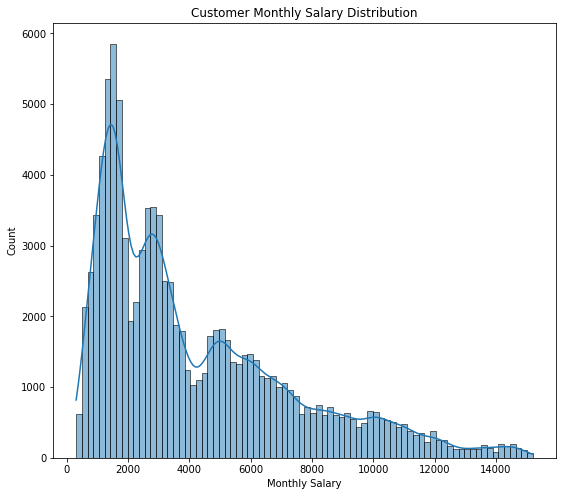

In [79]:
plt.figure(figsize=(9,8))
sns.histplot(data=df, x="Monthly_Inhand_Salary", kde=True)
plt.title('Customer Monthly Salary Distribution')
plt.xlabel('Monthly Salary')
plt.show()

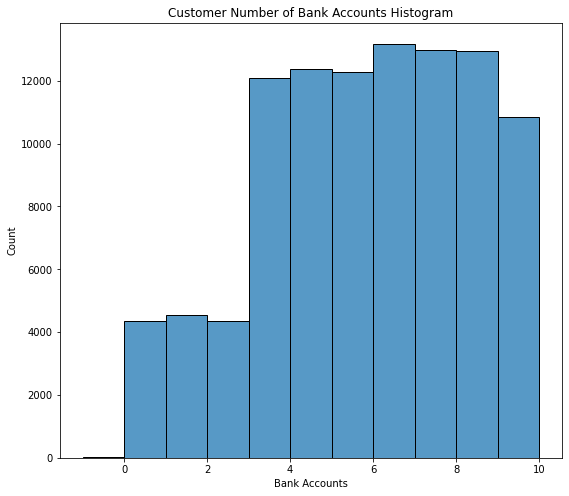

In [80]:
plt.figure(figsize=(9,8))
sns.histplot(data=df, x="Num_Bank_Accounts", bins = 11)
plt.title('Customer Number of Bank Accounts Histogram')
plt.xlabel('Bank Accounts')
plt.show()

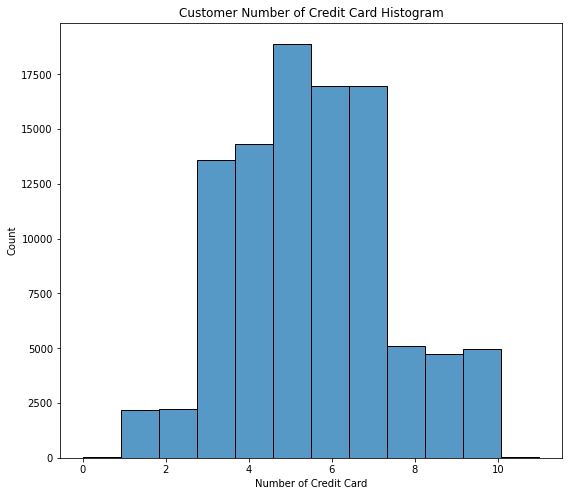

In [81]:
plt.figure(figsize=(9,8))
sns.histplot(data=df, x="Num_Credit_Card",bins=12)
plt.title('Customer Number of Credit Card Histogram')
plt.xlabel('Number of Credit Card')
plt.show()

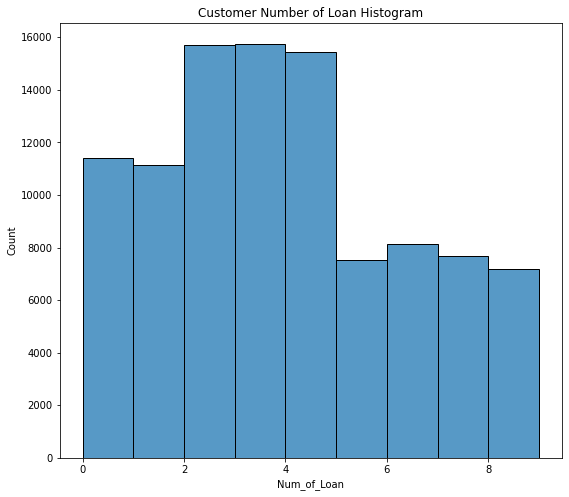

In [82]:
plt.figure(figsize=(9,8))
sns.histplot(data=df, x="Num_of_Loan", bins=9)
plt.title('Customer Number of Loan Histogram')
plt.xlabel('Num_of_Loan')
plt.show()

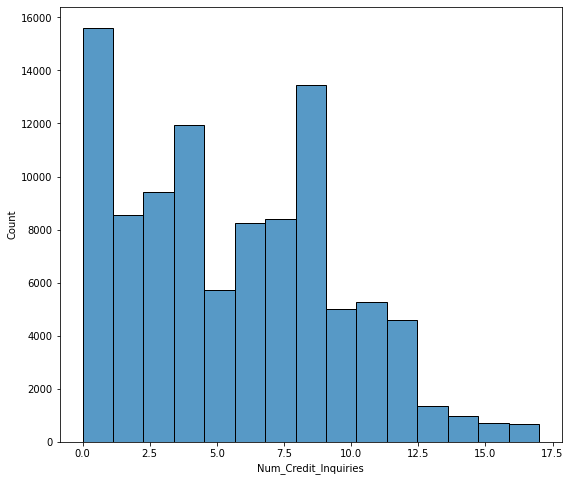

In [83]:
plt.figure(figsize=(9,8))
sns.histplot(data=df, x="Num_Credit_Inquiries", bins=15)
plt.xlabel('Num_Credit_Inquiries')
plt.show()

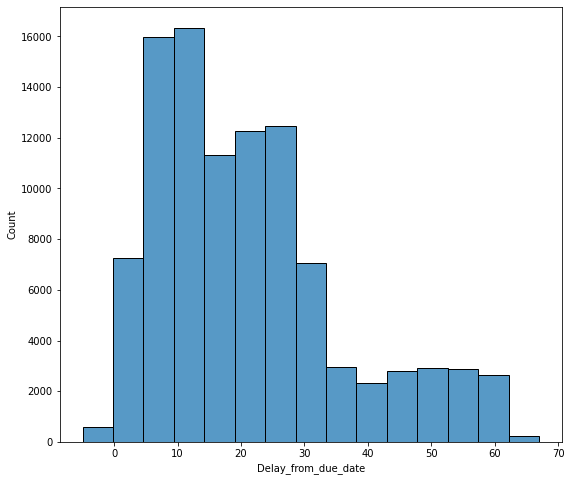

In [84]:
plt.figure(figsize=(9,8))
sns.histplot(data=df, x="Delay_from_due_date", bins=15)
plt.xlabel('Delay_from_due_date')
plt.show()

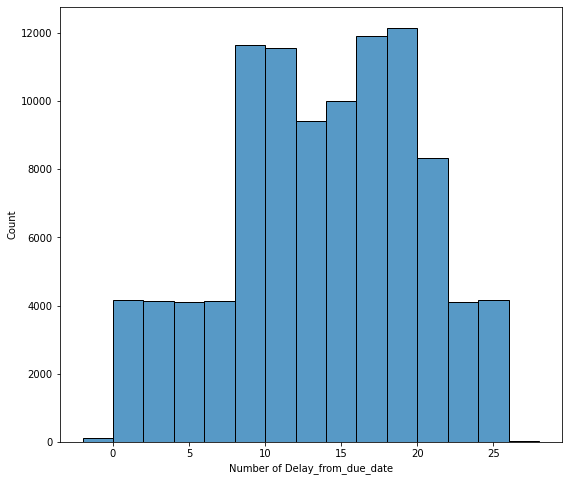

In [85]:
plt.figure(figsize=(9,8))
sns.histplot(data=df, x="Num_of_Delayed_Payment", bins=15)
plt.xlabel('Number of Delay_from_due_date')
plt.show()

          Credit_Score
Standard         53174
Poor             28998
Good             17828


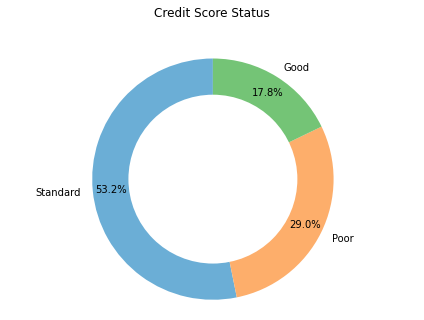

In [86]:
credit_score_aug = df.Credit_Score.value_counts().to_frame()
print(credit_score_aug)

# Pie chart
labels = credit_score_aug.index
sizes = credit_score_aug.Credit_Score
#colors
colors = ['#6baed6','#fdae6b','#74c476'] 
fig, ax = plt.subplots()
ax.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
ax.set_title('Credit Score Status', pad=30)
plt.show()

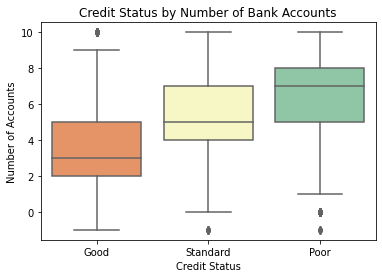

In [87]:
sns.boxplot(y=df["Num_Bank_Accounts"], x=df['Credit_Score'], palette='Spectral')
plt.title('Credit Status by Number of Bank Accounts')
plt.xlabel('Credit Status')
plt.ylabel('Number of Accounts')
plt.show()

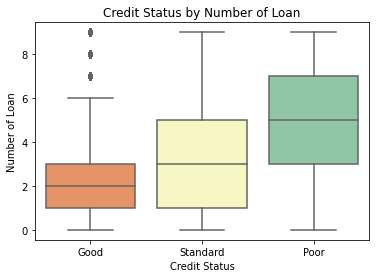

In [88]:
sns.boxplot(y=df["Num_of_Loan"], x=df['Credit_Score'], palette='Spectral')
plt.title('Credit Status by Number of Loan')
plt.xlabel('Credit Status')
plt.ylabel('Number of Loan')
plt.show()

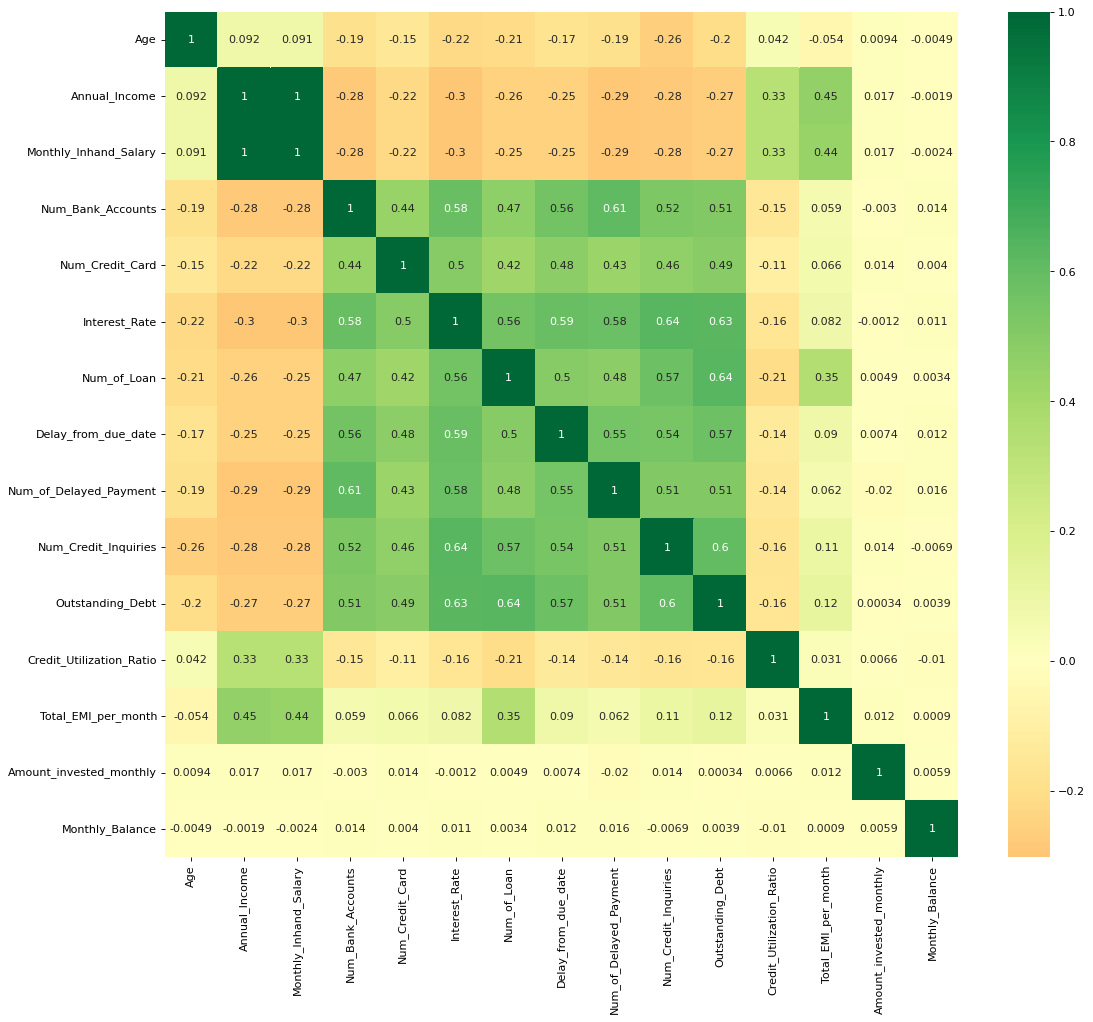

In [89]:
columns=['Age', 'Annual_Income', 'Monthly_Inhand_Salary','Num_Bank_Accounts', 'Num_Credit_Card',\
         'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',\
         'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month',\
         'Amount_invested_monthly', 'Monthly_Balance']
temp_df = df[columns]
plt.figure(figsize=(16,14), dpi= 80)
sns.heatmap(temp_df.corr(), xticklabels=temp_df.corr().columns, yticklabels=temp_df.corr().columns,\
            cmap='RdYlGn', center=0, annot=True);

In [90]:
#made a copy to work on encoding and scaling.
new_df = df.copy()
#clean Payment_of_Min_Amount NM value
new_df.Payment_of_Min_Amount.replace('NM', np.nan, inplace=True)
new_df.Payment_of_Min_Amount = new_df.groupby('Customer_ID')['Payment_of_Min_Amount'].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

In [91]:
#Remove unwanted col
drop_col = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN'] 
new_df.drop(columns=drop_col, inplace=True)

In [92]:
#Categorical encoding
categorical_col = new_df.select_dtypes(['object']).columns
numerical_col = new_df.select_dtypes(exclude=['object']).columns

new_df = pd.get_dummies(new_df, columns = ['Occupation', 'Payment_Behaviour'])
new_df['Credit_Mix'] = new_df['Credit_Mix'].map({'Bad':0, 'Good':1, 'Standard':2})
new_df['Credit_Score'] = new_df['Credit_Score'].map({'Poor':0, 'Good':1, 'Standard':2})
new_df['Payment_of_Min_Amount'] = new_df['Payment_of_Min_Amount'].map({'No':0, 'Yes':1})

In [93]:
from sklearn import preprocessing

In [94]:
## MinMax Scaling
scaling_df = preprocessing.MinMaxScaler().fit_transform(new_df[numerical_col])
scaling_df = pd.DataFrame(scaling_df, columns = numerical_col)
new_df[numerical_col] = scaling_df[numerical_col]

In [95]:
new_df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Personal Loan,Home Equity Loan,Not Specified,Mortgage Loan,Student Loan,Debt Consolidation Loan,Payday Loan,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0.214286,0.069997,0.102087,0.363636,0.363636,0.060606,0.444444,0.111111,0.2,0.465276,0.235294,1,0.16202,0.140104,0.666667,0,0.027865,0.002479,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0.214286,0.069997,0.102087,0.363636,0.363636,0.060606,0.444444,0.055556,0.2,0.465276,0.235294,1,0.16202,0.140104,0.666667,0,0.027865,0.002479,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0.214286,0.069997,0.102087,0.363636,0.363636,0.060606,0.444444,0.111111,0.2,0.465276,0.235294,1,0.16202,0.140104,0.666667,0,0.027865,0.002479,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0.214286,0.069997,0.102087,0.363636,0.363636,0.060606,0.444444,0.138889,0.2,0.465276,0.235294,1,0.16202,0.140104,0.666667,0,0.027865,0.002479,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0.214286,0.069997,0.102087,0.363636,0.363636,0.060606,0.444444,0.152778,0.2,0.465276,0.235294,1,0.16202,0.140104,0.666667,0,0.027865,0.002479,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [96]:
new_df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Personal Loan,Home Equity Loan,Not Specified,Mortgage Loan,Student Loan,Debt Consolidation Loan,Payday Loan,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0.214286,0.069997,0.102087,0.363636,0.363636,0.060606,0.444444,0.111111,0.2,0.465276,0.235294,1,0.16202,0.140104,0.666667,0,0.027865,0.002479,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0.214286,0.069997,0.102087,0.363636,0.363636,0.060606,0.444444,0.055556,0.2,0.465276,0.235294,1,0.16202,0.140104,0.666667,0,0.027865,0.002479,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0.214286,0.069997,0.102087,0.363636,0.363636,0.060606,0.444444,0.111111,0.2,0.465276,0.235294,1,0.16202,0.140104,0.666667,0,0.027865,0.002479,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0.214286,0.069997,0.102087,0.363636,0.363636,0.060606,0.444444,0.138889,0.2,0.465276,0.235294,1,0.16202,0.140104,0.666667,0,0.027865,0.002479,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0.214286,0.069997,0.102087,0.363636,0.363636,0.060606,0.444444,0.152778,0.2,0.465276,0.235294,1,0.16202,0.140104,0.666667,0,0.027865,0.002479,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [97]:
new_df.shape

(100000, 50)

### Baseline Model

In [98]:
X = new_df.drop(["Credit_Score"],axis=1)
y = new_df["Credit_Score"]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
baseline = LogisticRegression(random_state=0).fit(X_train, y_train)

In [101]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(baseline.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(baseline.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on training set: 0.65
Accuracy of Logistic Regression classifier on test set: 0.66


In [102]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
y_pred_baseline = baseline.predict(X_test)
print(classification_report(y_test, y_pred_baseline))

              precision    recall  f1-score   support

           0       0.67      0.53      0.60      5874
           1       0.57      0.57      0.57      3527
           2       0.67      0.75      0.71     10599

    accuracy                           0.66     20000
   macro avg       0.64      0.62      0.63     20000
weighted avg       0.66      0.66      0.65     20000

